In [5]:
import cv2
import warnings
import numpy as np
import matplotlib.pyplot as plt

# other configurations
warnings.filterwarnings('ignore')
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [50, 50]

#### Functions

In [2]:
def plot(img):
    plt.imshow(img, cmap='gray');

def save(img_name, img):
    cv2.imwrite(img_name, img)


def smoothing(img):  # Removing noise
    image = img
    kernelSizes = [(1, 1)]
    # loop over the kernels sizes
    for kernelSize in kernelSizes:
        # construct a rectangular kernel from the current size and then
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
        img_smoothed = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return img_smoothed

# getting the dashed and dotted lines, but the outputs have noises    
def getContours(img): 

    def TrouveContours(image):
        ret, thresh_binary = cv2.threshold(image, 107, 255, cv2.THRESH_BINARY)
        
        # findcontours
        contours, hierarchy = cv2.findContours(
            image=thresh_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
        return contours, hierarchy
        
    # checking if the image is in grayscale format
    if len(img.shape) == 3: 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        pass
    
    cell1 = img.copy()
     
    
    # create an empty mask
    mask_dotted = np.zeros(cell1.shape[:2], dtype=np.uint8)
    
    contours, hierarchy = TrouveContours(cell1) # the function which get the contrours of the image 
    
    # loop through the contours
    for i, cnt in enumerate(contours):
        # if the contour has no other contours inside of it
        if hierarchy[0][i][2] == -1:
            # if the size of the contour is greater or less than a threshold
            if cv2.contourArea(cnt) < 10:  # Dotted lines
                cv2.drawContours(mask_dotted, [cnt], -1, (255),1, cv2.LINE_AA)
        
        
    return mask_dotted

def seg_lines(gray_img, mask):
    # get the dotted lines
    dot_lines = mask.copy() 
    # get the dashed lines
    mask_dashed = cv2.subtract(gray_img, dot_lines)
    dash_lines = cv2.subtract(mask_dashed, dot_lines)
    #Moving small points from the previous process
    dash_lines = cv2.blur(dash_lines,(3,3))
    
    return dot_lines, dash_lines

'''def seg_texts(img_dot, img_dash):
    return img_text'''

'def seg_texts(img_dot, img_dash):\n    return img_text'

In [3]:
img = cv2.imread('Moldes.tif')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Dotted and Dashed lines
dot_lines, dash_lines = seg_lines(gray, mask=getContours(gray))

cv2.imwrite(r'lines_detection\dot_lines.png',dot_lines)

In [ ]:
a_test = cv2.dilate(dash_lines, np.ones((1,1), np.uint8), 3) #getContours(dash_lines)
plot(a_test)

In [33]:
thresh = cv2.threshold(a_test, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
result = a_test.copy()

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

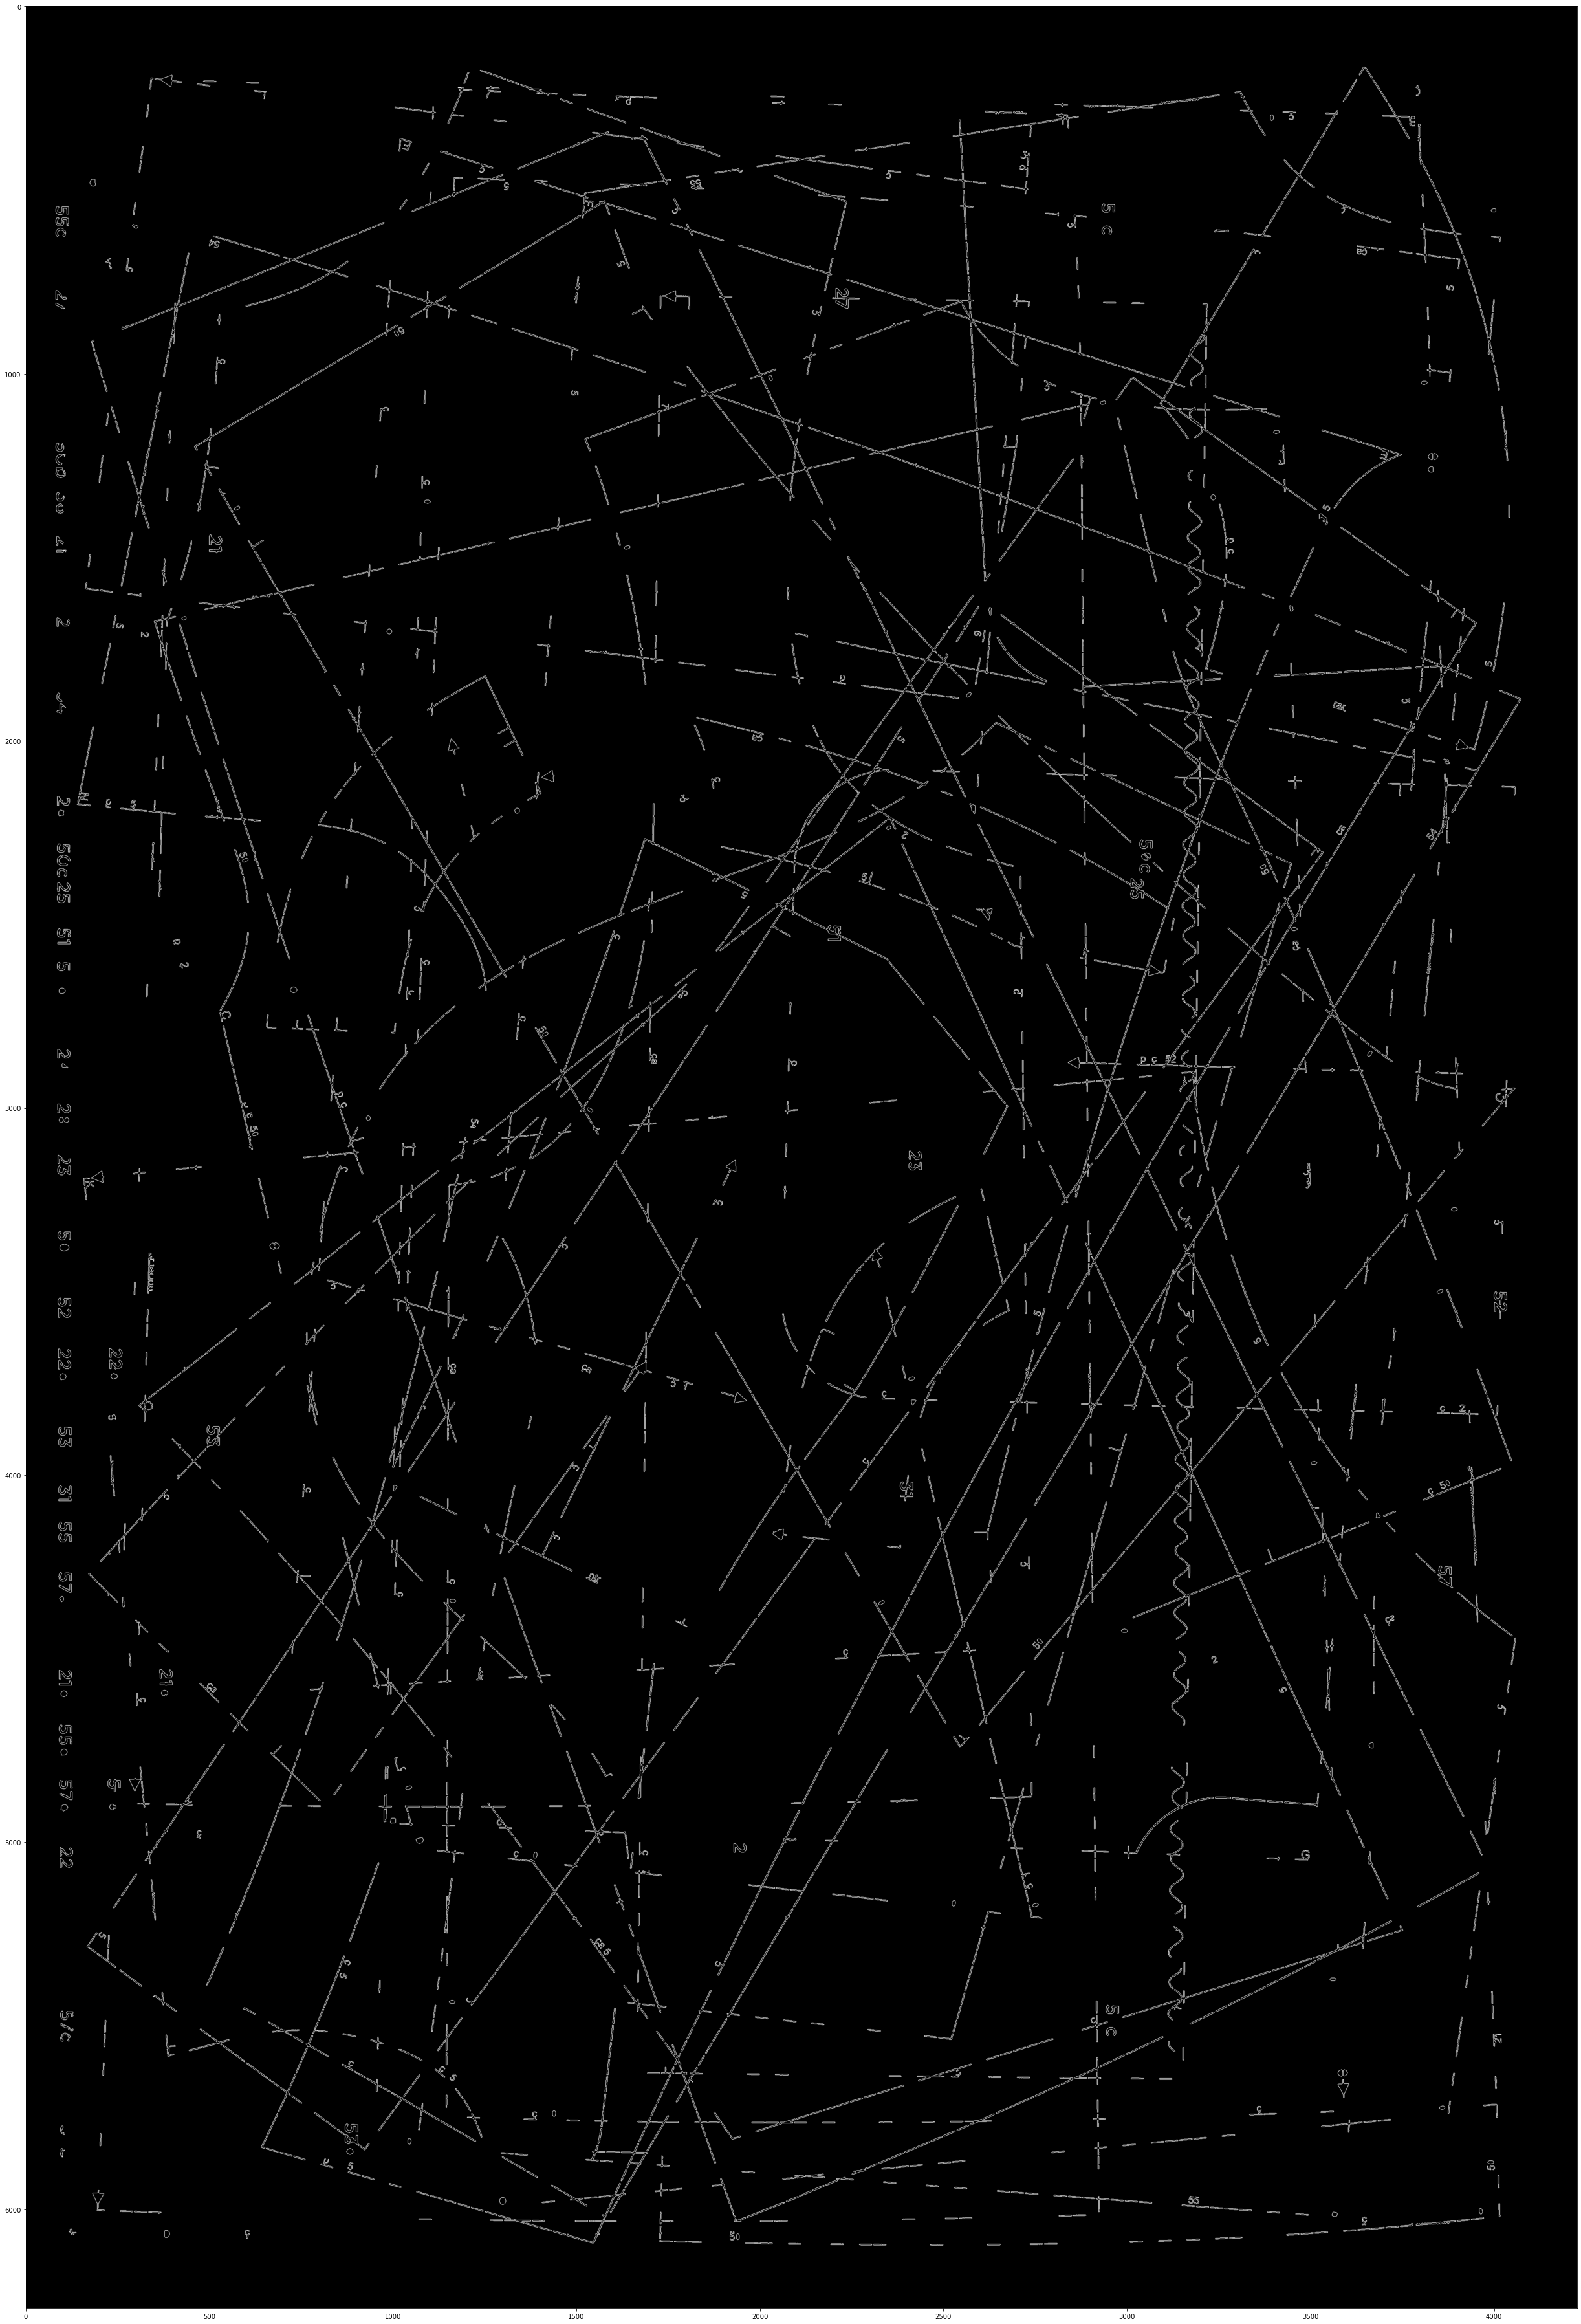

In [34]:
text(result)